##Lab 1 - Klasifikasi Bunga Iris dengan Perceptron

###Langkah 1 - Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

###Langkah 2 - Load Data dan Visualisasi

In [3]:
df = pd.read_csv('iris.csv', header=None)
df.head()

,0,1,2,3,4
0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa


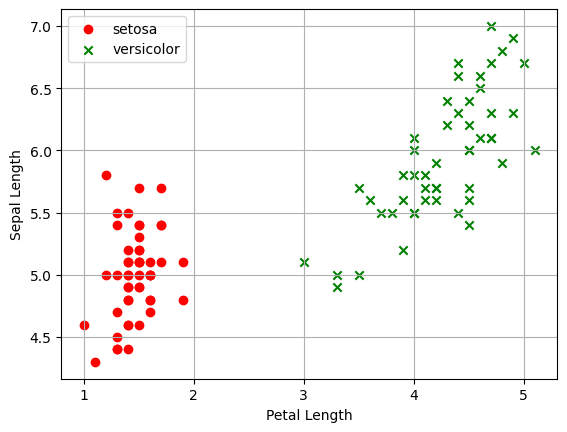

In [8]:
df = pd.read_csv('iris.csv')
setosa = df[df['species'] == 'setosa']
versicolor = df[df['species'] == 'versicolor']
virginica = df[df['species'] == 'virginica']

a, b = 'petal length (cm)', 'sepal length (cm)'

plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='green', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

###Langkah 3 - Membuat Kelas Perceptron

In [9]:
class Perceptron(object):
  def __init__(self, eta=0.01, n_iter=10):
    self.eta = eta
    self.n_iter = n_iter

  def fit(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[0] += update
        self.w_[1:] += update * xi
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)

###Langkah 4 - Pilih Data dan Encoding Label

In [10]:
y = df.iloc[0:100, 4]
y = np.where(y == 'setosa', -1, 1)
X = df.iloc[0:100, [0, 3]].values

###Langkah 5 - Fitting Model

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

###Langkah 6 - Visualisasi Nilai Error Per Epoch

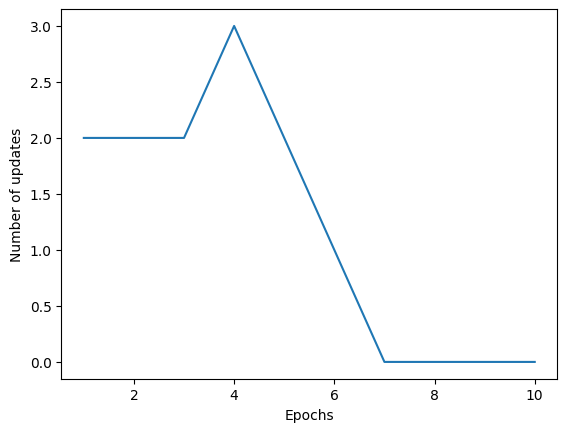

In [12]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

###Langkah 7 - Visualisasi Decision Boundary

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('r', 'b', 'g', 'k', 'grey')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)

  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for i, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

/tmp/ipython-input-1089907624.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


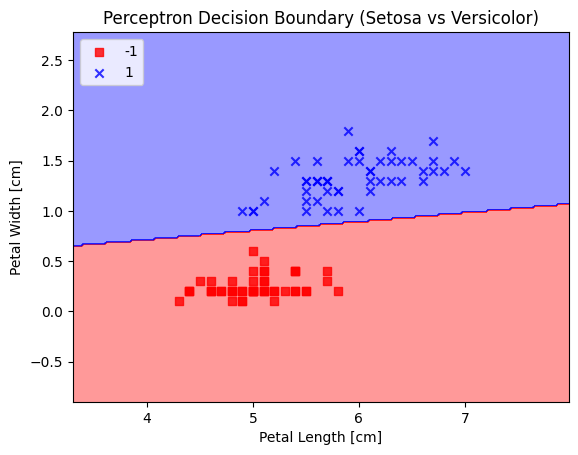

In [14]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Petal Length [cm]')
plt.ylabel('Petal Width [cm]')
plt.legend(loc='upper left')
plt.title('Perceptron Decision Boundary (Setosa vs Versicolor)')
plt.show()

##Lab 2 - Nilai Logika XOR dengan MLP

###Langkah 1 - Import Library

In [15]:
from sklearn.neural_network import MLPClassifier

###Langah 2 - Buat Data

In [16]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

###Langkah 3 - Fit Model

In [17]:
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

###Langkah 4 - Prediksi

In [18]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


##Lab 3 - Klasifikasi Churn Rate dengan ANN

###Pra Pengolahan Data

####Langkah 1 - Import Library

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf

####Langkah 2 - Load Data

In [20]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

cek data (X)

In [21]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


####Langkah 3 - Encoding Data Kategorikal

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [23]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


####Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [25]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


####Langkah 5 - Split Data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

####Langkah 6 - Scaling Fitur

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###Membuat Model ANN

####Langkah 1 - Inisiasi Model ANN

In [30]:
ann = tf.keras.models.Sequential()

####Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [31]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

####Langkah 3 - Membuat Hidden Layer Kedua

In [32]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

####Langkah 4 - Membuat Output Layer

In [33]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

###Training Model

####Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

####Langkah 2 - Fitting Model

In [35]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6060 - loss: 0.6487
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7975 - loss: 0.4822
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8053 - loss: 0.4554
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8109 - loss: 0.4403
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8164 - loss: 0.4259
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8176 - loss: 0.4299
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8148 - loss: 0.4277
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8287 - loss: 0.4098
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8210 - loss: 0.4164
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8228 - loss: 0.4115
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8237 - loss: 0.4160
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

####Modelkan Data Baru dan Buat Prediksi

In [36]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
[[False]]


####Prediksi Dengan Data Testing

In [37]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


####Cek Akurasi dan Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1510   85]
 [ 191  214]]


0.862

##Lab 4 - Klasifikasi Siang dan Malam dengan ANN

###Langkah 1 - Import Library

In [40]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models

###Langkah 2 - Load Dataset

In [51]:
def load_dataset(img_dir):
  p = Path(img_dir)
  img_list = []
  for folder in p.glob('*'):
    label = folder.name
    for file in folder.glob('*.jpg'):
      img = cv2.imread(str(file))
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img_list.append((img, label))
  return img_list

train_dir = "/content/drive/MyDrive/images/training"
test_dir = "/content/drive/MyDrive/images/test"

train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)

###Langkah 2 - Pra Pengolahan

In [52]:
def resize_image(img, size=(256, 256)):
  return cv2.resize(img, size)

def label_encoder(label):
  return 1 if label == 'day' else 0

def preprocess(img_list):
  X = []
  y = []
  for img, label in img_list:
    img_std = resize_image(img)
    X.append(img_std)
    y.append(label_encoder(label))
  return X, y

X_train_img, y_train = preprocess(train_img)
X_test_img, y_test = preprocess(test_img)

###Langkah 3 - Ekstraksi Fitur

In [54]:
def extract_hog(X_imgs):
  feats = []
  for img in X_imgs:
    # The image is already grayscale from load_dataset, no need to convert again
    hog_feat = hog(img,
                   orientations=9,
                   pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2),
                   block_norm='L2-Hys',
                   visualize=False,
                   feature_vector=True)
    feats.append(hog_feat)
  return np.array(feats)

X_train_feat = extract_hog(X_train_img)
X_test_feat = extract_hog(X_test_img)

###Langkah 4 - Standardisasi Fitur

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled  = scaler.transform(X_test_feat)

###Langkah 5 - Buat Data Latih dan Validasi

In [56]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42
)

# Convert label ke numpy array
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)

###Langkah 6 - Buat Model ANN

In [58]:
input_dim = X_train.shape[1]
model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │     4,428,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,436,737 (16.92 MB)

 Trainable params: 4,436,737 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

###Langkah 7 - Latih Model

In [59]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.6752 - loss: 1.1266 - val_accuracy: 0.9792 - val_loss: 0.1152
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 6.5558e-05
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 2.0136e-05
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 1.0000 - loss: 2.5837e-04 - val_accuracy: 1.0000 - val_loss: 1.1431e-05
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 1.0000 - loss: 1.8786e-05 - val_accuracy: 1.0000 - val_loss: 7.5853e-06
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 1.0000 - loss: 5.9582e-05 - val_accuracy: 1.0000 - val_loss: 5.8880e-06
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 1.0000 - loss: 1.5828e-05 - val_accuracy: 1.0000 - val_loss: 5.0993e-06
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 1.0000 - loss: 6

###Langkah 8 - Evaluasi Model dengan Data Test

In [60]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Akurasi Test:", test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8923 - loss: 1.2243
Akurasi Test: 0.9125000238418579


###Langkah 9 - Buat Laporan Performansi Model

In [61]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        80
           1       0.93      0.89      0.91        80

    accuracy                           0.91       160
   macro avg       0.91      0.91      0.91       160
weighted avg       0.91      0.91      0.91       160

[[75  5]
 [ 9 71]]


###Langkah 10 - Visualisasi Proses Training

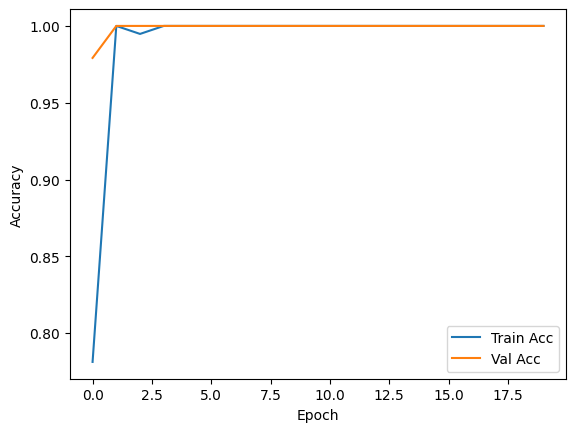

In [62]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Langkah 11 - Simpan Model

In [63]:
model.save('day_night_classifier_model.h5')